<a href="https://colab.research.google.com/github/bermudezfc/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [144]:
df = pd.read_excel('personality.xlsx')
df

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Joyce Anne,0,0,0,32,0
1,Jascent Pearl,1,1,0,762,1
2,Jef Gannaban,0,0,0,347,0
3,Diana Danga,0,1,1,1100,0
4,Marc Castro,1,1,1,654,1
5,Angelo Basilio,1,1,1,543,1
6,Brix Manzanero,1,1,1,765,1
7,Iber Bonilla,1,1,1,1400,1
8,Brando Donato,1,1,1,450,1
9,Kalli Fuentes,1,1,1,491,1


1. Display the summary of all the features of the dataset using `.info()`

In [8]:
df.drop(columns='Name', inplace=True)

In [10]:
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,0,0,0,32,0
1,1,1,0,762,1
2,0,0,0,1600,0
3,0,1,1,1100,0
4,1,1,1,2660,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [12]:
df.describe()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.600000,0.600000,0.460000,636.960000,0.560000
std,0.494872,0.494872,0.503457,649.813787,0.501427
min,0.000000,0.000000,0.000000,32.000000,0.000000
25%,0.000000,0.000000,0.000000,247.000000,0.000000
50%,1.000000,1.000000,0.000000,427.000000,1.000000
75%,1.000000,1.000000,1.000000,820.500000,1.000000
max,1.000000,1.000000,1.000000,3200.000000,1.000000


2. Display the total number of samples from each label using `.value_counts()`

In [13]:
df['Personality'].value_counts()

,count
Personality,
1,28
0,22


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [14]:
X = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [15]:
y = df['Personality'].values

In [16]:
print(X)

[[   0    0    0   32]
 [   1    1    0  762]
 [   0    0    0 1600]
 [   0    1    1 1100]
 [   1    1    1 2660]
 [   1    1    1 1886]
 [   1    1    1 1500]
 [   1    1    1 1400]
 [   1    1    1  450]
 [   1    1    1  491]
 [   1    1    1  154]
 [   0    0    0  284]
 [   0    0    0  164]
 [   1    1    1 1200]
 [   1    1    1 1200]
 [   1    1    1  285]
 [   1    1    1  250]
 [   0    0    0  118]
 [   0    0    0  200]
 [   1    0    1  514]
 [   1    1    0  840]
 [   0    0    0  100]
 [   1    1    0  615]
 [   1    0    1  354]
 [   0    1    0  521]
 [   0    0    0  300]
 [   1    0    1  545]
 [   1    1    1 3200]
 [   0    0    0  180]
 [   0    0    0  250]
 [   1    1    1 1000]
 [   0    0    0  150]
 [   0    1    0  896]
 [   0    1    0  357]
 [   1    1    1  625]
 [   1    1    1  256]
 [   0    1    0  146]
 [   1    1    0  246]
 [   1    1    0  533]
 [   1    0    1  554]
 [   1    0    1 1235]
 [   1    0    0  351]
 [   0    1    0  179]
 [   1    0

In [17]:
X.shape

(50, 4)

In [18]:
print(y)

[0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 0 1 0 1 1 0 0]


In [19]:
y.shape

(50,)

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 4)
(20, 4)
(30,)
(20,)


In [135]:
print(X_train)

[[   1    0    0  351]
 [   0    1    0  357]
 [   0    1    0  521]
 [   1    1    1  154]
 [   1    1    0  542]
 [   0    0    0  300]
 [   0    0    0  200]
 [   1    1    0  615]
 [   1    1    0  840]
 [   0    0    0  324]
 [   1    1    0  762]
 [   0    0    0  284]
 [   1    1    1 1200]
 [   1    0    1 1235]
 [   1    1    1  484]
 [   1    1    1  285]
 [   0    0    0  164]
 [   1    1    1 1400]
 [   0    0    0  404]
 [   1    1    1 1000]
 [   1    1    1 3200]
 [   1    0    1  554]
 [   0    1    0  146]
 [   1    1    1  450]
 [   1    1    1  491]
 [   1    1    1  250]
 [   1    1    0  533]
 [   1    1    1  295]
 [   1    1    1 1200]
 [   1    1    1  256]]


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

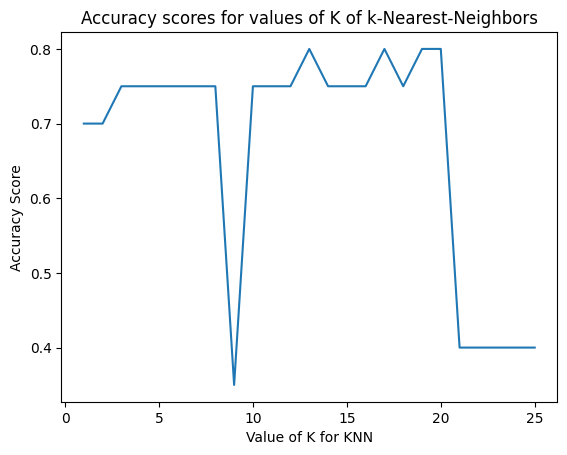

In [145]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model
  knn.fit(X_train, y_train)

  #Test the model
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy scores for values of K of k-Nearest-Neighbors')
plt.show()


7. Train the model using the `.fit()`

In [148]:
  knn = KNeighborsClassifier(n_neighbors=9)

  #Train the model
  knn.fit(X_train, y_train)

  #Test the model
  y_pred = knn.predict(X_test)
  metrics.accuracy_score(y_test, y_pred)


0.35

8. Test the model using the `.predict()`

In [153]:
knn.predict([[0, 1, 0, 1000]])

array([1])

## Evaluate the model

9. Create a confusion matrix

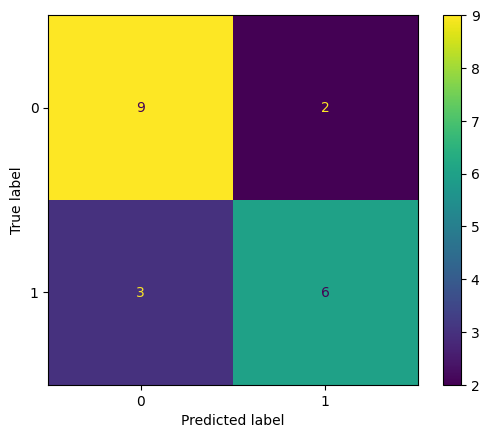

In [139]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [140]:
metrics.accuracy_score(y_test, y_pred)

0.75

11. Display the precision

In [141]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.81818182 0.66666667]


12. Display the recall

In [142]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)


Recall: [0.75 0.75]


13. Display the f1-score

In [143]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.7826087  0.70588235]
